In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Plot settings
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [3]:
# Generate two dataset of 10e6 observations contanining 25 features each
Nobs = 1000000
data1 = 5.0*np.random.randn(Nobs,25) - 2.5
data2 = 5.0*np.random.randn(Nobs,25) + 2.5

In [4]:
# Add a dataset label as 26h column (here 1 or 2)
data1_labelled = np.append(data1, np.zeros(shape=(Nobs, 1))+1, axis=1)
data2_labelled = np.append(data2, np.zeros(shape=(Nobs, 1))+2, axis=1)

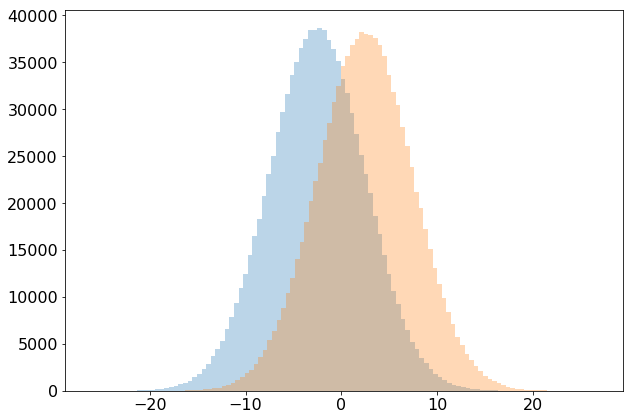

In [5]:
# Plotting the distributions of the first feature
plt.hist(data1[:, 0], bins=100, alpha=0.3)
plt.hist(data2[:, 0], bins=100, alpha=0.3);

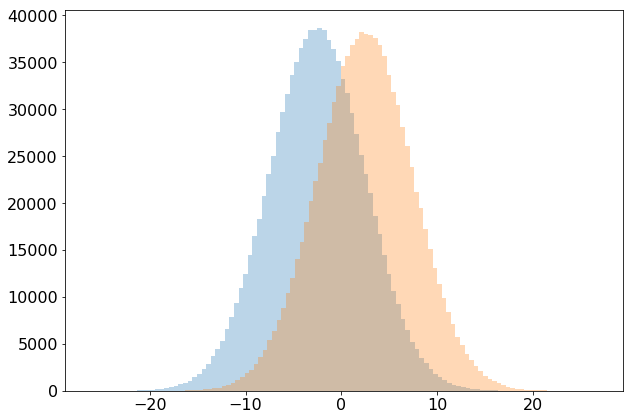

In [6]:
# Trying with mergning data first
data = np.concatenate([data1_labelled, data2_labelled])
var0_data1 = data[data[:,25]==1][:,0]
var0_data2 = data[data[:,25]==2][:,0]
plt.hist(var0_data1, bins=100, alpha=0.3)
plt.hist(var0_data2, bins=100, alpha=0.3);

In [7]:
# compute distances for a test observation
unknown_obs = np.random.randn(25)
print(unknown_obs)

[-0.20230327  2.31292411 -0.08935764  0.21389329  1.26157226  1.0550058
  0.04277529 -0.95536696 -0.75031213  0.60747831  0.32856671  0.50310094
 -0.08315663  0.85243028 -0.1026989   1.33915907 -0.91464452  0.40191894
  0.41859121 -2.86485036 -1.13537537  1.38880791 -0.48065517 -1.00176919
  1.30490761]


In [8]:
# Get the distances with all data
distances = np.sum((data[:, :25]-unknown_obs)**2, axis=1)**(0.5)

In [9]:
# Add the dataset label to the distances
distances = distances.reshape(2*Nobs, 1)
flags = data[:, 25].reshape(2*Nobs, 1)
distances = np.append(distances, flags, axis=1)
print(distances.shape)

(2000000, 2)


In [10]:
# Rank the distances
sorted_arg = np.argsort(distances[:,0])
sdistances = distances[sorted_arg]

In [11]:
# Get the number of neighbor type 1 and type 2 among the k nearest neighbor
kMax=500
Nb1 = [len(sdistances[:k][sdistances[:k, 1]==1]) for k in np.arange(0,kMax)]
Nb2 = [len(sdistances[:k][sdistances[:k, 1]==2]) for k in np.arange(0,kMax)]

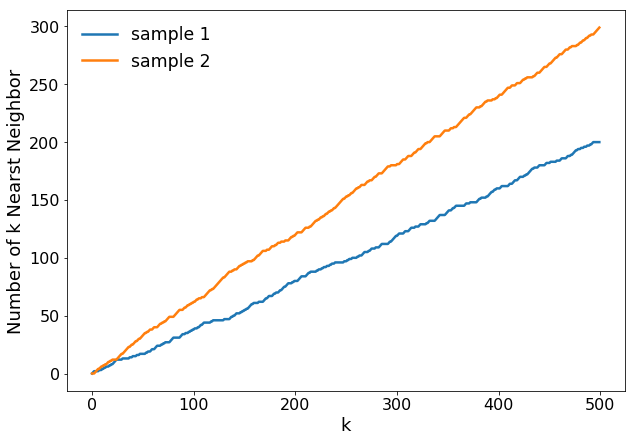

In [12]:
plt.plot(Nb1, label='sample 1')
plt.plot(Nb2, label='sample 2')
plt.ylabel('Number of k Nearst Neighbor')
plt.xlabel('k')
plt.legend();

In [13]:
def get_kNN(o, d1, d2, kmax=500):
    
    '''
    Compute the number of nearest neighbors (up to kmax) of an 
    observation `o` for two sample `d1` and `d2`.
    
    return N1, N2 (array of neighbors number for each k<kmax)
    '''
    
    # Compute distances
    r1 = np.sum((d1-o)**2, axis=1)**(0.5)
    r2 = np.sum((d2-o)**2, axis=1)**(0.5)
    
    # Define labels for each dataset
    l1 = np.zeros((d1.shape[0], 1))+1
    l2 = np.zeros((d2.shape[0], 1))+2
    
    # Add them to distance array
    r1 = np.append(r1.reshape(d1.shape[0], 1), l1, axis=1)
    r2 = np.append(r2.reshape(d2.shape[0], 1), l2, axis=1)
    
    # Merge the distances of the two datasets
    r = np.concatenate([r1, r2], axis=0)
    
    # Sort the distances
    arg = np.argsort(r[:, 0])
    r = r[arg]
    
    # Count the neighbor 1 and 2 around the observation
    N1 = [len(r[:k][r[:k, 1]==1]) for k in np.arange(0,kmax)]
    N2 = [len(r[:k][r[:k, 1]==2]) for k in np.arange(0,kmax)]
    
    # Return the array of number of nearest neighbor
    return [N1, N2]


def plot_kNN(kNN_array):
    for i, kNN in  enumerate(kNN_array):
        plt.plot(kNN, label='Sample {}'.format(i+1))
    plt.ylabel('Number of k Nearst Neighbors')
    plt.xlabel('k')
    plt.legend()
    return

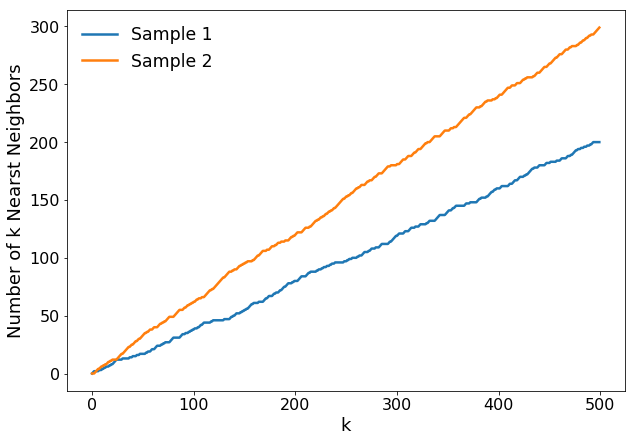

In [14]:
# Plot one observation
kNN = get_kNN(unknown_obs, data1[:, :25], data2[:, :25])
plot_kNN(kNN)

In [15]:
def get_kNN_vec(o, d1, d2, kmax=500):
    
    '''
    Compute the number of nearest neighbors (up to kmax) of an 
    observation `o` for two sample `d1` and `d2`.
    
    return N1, N2 (array of neighbors in data1 and data2 in the kmax nearest ones)
    '''
    
    # Get some numbers (o must be a 2D array)
    nd, nv = o.shape[0], o.shape[1]
    n1, n2 = d1.shape[0], d2.shape[0]
    
    # Prepare proper broadcasting
    d1 = d1.reshape(1, n1, nv)
    d2 = d2.reshape(1, n2, nv)
    o = o.reshape(nd, 1, nv)
    
    # Compute distances
    r1 = np.sum((d1-o)**2, axis=2)**(0.5)
    r2 = np.sum((d2-o)**2, axis=2)**(0.5)
    
    # Define labels for each dataset
    l1 = np.zeros(shape=(nd, n1, 1))+1
    l2 = np.zeros(shape=(nd, n2, 1))+2
    
    # Add them to distance array
    r1 = np.append(r1.reshape(*r1.shape, 1), l1, axis=2)
    r2 = np.append(r2.reshape(*r2.shape, 1), l2, axis=2)
    
    # Merge the distances of the two datasets
    r = np.concatenate([r1, r2], axis=1)
    
    # Sort the distances along distances
    indices = np.argsort(r[:, :, 0])
    r = np.take_along_axis(r, indices[:, :, np.newaxis], axis=1)
    
    # Count the neighbor 1 and 2 around the observation
    N1 = np.count_nonzero(r[:, :kmax, 1]==1, axis=1)
    N2 = np.count_nonzero(r[:, :kmax, 1]==2, axis=1)
    
    # Return the array of number of nearest neighbor
    return N1, N2

In [16]:
def kNNprediction(d, t1, t2, k=100, n=500):
    n1, n2 = t1.shape[0], t2.shape[0]
    d1, d2 = t1[::int(n1/n)], t2[::int(n2/n)]
    return get_kNN_vec(d, d1, d2, k)

In [17]:
# Generate pseudo data like data1 and data2
data_obs_like1 = 3*np.random.randn(1000,25)-2
data_obs_like2 = np.random.randn(1000,25)+1.5

In [20]:
# Compute the number of kNN for training1, training2
kmax = 200
obs1_N1, obs1_N2 = kNNprediction(d=data_obs_like1, t1=data1, t2=data2, k=kmax)
obs2_N1, obs2_N2 = kNNprediction(d=data_obs_like2, t1=data1, t2=data2, k=kmax)

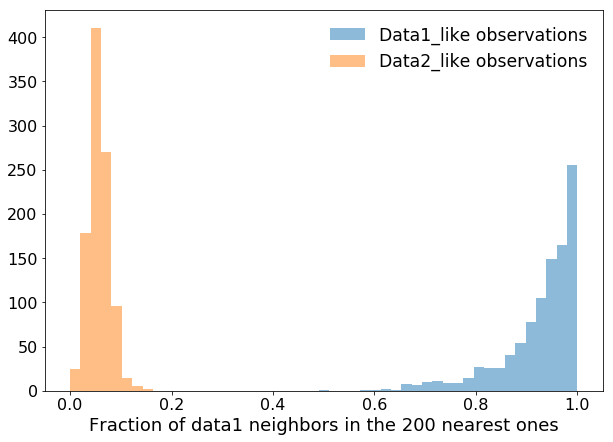

In [21]:
style = {'bins': np.linspace(0, 1, 50), 'alpha': 0.5}
plt.hist(obs1_N1/kmax, **style, label='Data1_like observations')
plt.hist(obs2_N1/kmax, **style, label='Data2_like observations');
plt.xlabel('Fraction of data1 neighbors in the {} nearest ones'.format(kmax))
plt.legend();

## Details of sorting and take_along_axis functions

In [ ]:
# Define 2 observations with 3 neighbors
a = np.array([
    [[0.3, 1],
    [0.2, 1],
    [0.5, 2]],
    
    [[0.47, 2],
    [0.23, 2],
    [0.15, 1]]])
print('(Nevt, k, distance+label) = {}'.format(a.shape))

In [ ]:
# Get sorted index along axis=(0, 1) based on the distance
ai = np.argsort(a[:, :, 0])
print(ai.shape)
print(ai)

In [ ]:
# Use fancy indexing AND broadcasting--> To be better understood
np.take_along_axis(a, ai[:, :, np.newaxis], axis=1)

## Next step/doc

1. Understand how the function `np.take_along_axis()` works exactly?
https://stackoverflow.com/questions/47044792/sort-invariant-for-numpy-argsort-with-multiple-dimensions , which requires to better understand fancy indexing ...
2. How to not redo the distance between a point and all the training points for a new observation? This is apparently not possible with kNN algo: This refers to *lazy* versus *eager* learner.
3. Re-write the main function for an arbitrary number of populations `di`